In [1]:
!pip install efficient_apriori
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import efficient_apriori
import networkx

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import LabelSet
from bokeh.models import ColumnDataSource
output_notebook()


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Loading BokehJS ...

# Interestingness

### Interestingness through Market-Basket analysis

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions.

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

### Apriori algorithm

The Apriori algorithm generates association rules for a given data set. An association rule implies that if an item A occurs, then item B also occurs with a certain probability. 

The Apriori algorithm generates association rules for a given data set. An association rule implies that if an item A occurs, then item B also occurs with a certain probability. Let's look at an example.

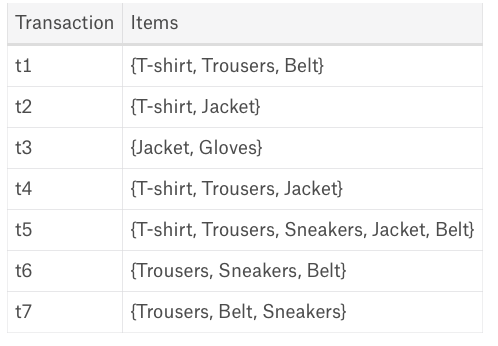

In [2]:
from IPython.display import Image
Image(filename='Images/market_basket.v1.png')

In the table above seven transactions from a clothing store is shown. Each transaction shows items bought in that transaction. We can represent our items as an item set as follows

$$ I = (i_1,i2,..., in) $$

                                        
In this case it will be:

                               
                                {T-shirt,Trousers,Belt,Jacket,Gloves,Sneakers}

A transaction is represented by the following expression:

$$  T = {t_1,i_2,..., t_k} $$

For instance

                                        T = {T-shirt,Trousers,Belt}

Then, an association rule is defined as an implication of the form:

$$ X=>Y, where  \quad  X ,  Y \subset I  \quad and \quad X \cap Y = 0 $$

For instance,
                                   
                                             {T-shirt, Trousers} => {Belt}
                    

## Interestingness Measures

- Support
- Confidence
- Lift
- Conviction

### Support

Support is a measure of how frequently the itemset appears in the dataset.

$$ supp(X=>Y) = \frac{X\cap Y}{n}  $$

In other words, support is the number of transactions with both X and Y divided by the total number of records.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Calculate the support of the following rules.

</div>

Let's look at some association rules with their supports calculated.

$ supp(Trousers => Jacket) = 2/7  $

$ supp(T-shirt => Trousers) = 3/7 $

$ supp(Trousers => Belt) = 4/7 $

$ supp(T-shirt => Belt) = 2/7 $

$ supp(T-shirt,Trousers => Belt ) = 2/7 $

In [3]:
print('𝑠𝑢𝑝𝑝(𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐽𝑎𝑐𝑘𝑒𝑡)')
print('As out 7 only twice Trousers and Jackets came together. So it is 2/7')
print('𝑠𝑢𝑝𝑝(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠)')
print('As out of 7 occurance of T-shirt and Trousers is three times. So it is 3/7')
print('𝑠𝑢𝑝𝑝(𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐵𝑒𝑙𝑡)')
print('Trousers and Belt came together four times out of 7 occurances. So it is 4/7')
print('𝑠𝑢𝑝𝑝(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝐵𝑒𝑙𝑡)')
print('From 7 incidents T-shirts and Belt happend twice. So it is 2/7')
print('𝑠𝑢𝑝𝑝(𝑇−𝑠ℎ𝑖𝑟𝑡,𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐵𝑒𝑙𝑡)')
print('T-shirt and Trousers occurance of coing together is two out of all 7. So it is 2/7')

𝑠𝑢𝑝𝑝(𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐽𝑎𝑐𝑘𝑒𝑡)
As out 7 only twice Trousers and Jackets came together. So it is 2/7
𝑠𝑢𝑝𝑝(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠)
As out of 7 occurance of T-shirt and Trousers is three times. So it is 3/7
𝑠𝑢𝑝𝑝(𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐵𝑒𝑙𝑡)
Trousers and Belt came together four times out of 7 occurances. So it is 4/7
𝑠𝑢𝑝𝑝(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝐵𝑒𝑙𝑡)
From 7 incidents T-shirts and Belt happend twice. So it is 2/7
𝑠𝑢𝑝𝑝(𝑇−𝑠ℎ𝑖𝑟𝑡,𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐵𝑒𝑙𝑡)
T-shirt and Trousers occurance of coing together is two out of all 7. So it is 2/7


### Confidence

In an association rule X => Y, given that X occured, confidence is the frequency of Y happening. Mathematically, it is defined as follows:

$$ conf(X=>Y) = \frac{supp(X,Y)}{supp(X)} $$ 


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Calculate the confidence of the following rules.

</div>

$ conf(Sneaekrs => T-shirt) = (1/7)/(3/7) = 1/3 $

$ conf(T-shirt => Jacket) = (3/7)/(4/7) = 3/4 $

$ conf( \{Trousers, Belt\} => Sneakers) = (3/7)/(4/7) = 3/4 $

In [4]:
print('𝑐𝑜𝑛𝑓(𝑆𝑛𝑒𝑎𝑒𝑘𝑟𝑠=>𝑇−𝑠ℎ𝑖𝑟𝑡)')
print('As out 7 Sneaekrs and T-shirts came together once but Snearkers came 3 times total in the dataset So it is 1/3')
print('𝑐𝑜𝑛𝑓(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝐽𝑎𝑐𝑘𝑒𝑡)')
print('As out of 7 occurance of T-shirt and Jacket is thrice but T-shirt occured four times in the data. So it is 3/4')
print('𝑐𝑜𝑛𝑓({𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠,𝐵𝑒𝑙𝑡}=>𝑆𝑛𝑒𝑎𝑘𝑒𝑟𝑠)')
print('Trousers and Belt came with Sneakers thrice and overall they came together four times. So it is 3/4')

𝑐𝑜𝑛𝑓(𝑆𝑛𝑒𝑎𝑒𝑘𝑟𝑠=>𝑇−𝑠ℎ𝑖𝑟𝑡)
As out 7 Sneaekrs and T-shirts came together once but Snearkers came 3 times total in the dataset So it is 1/3
𝑐𝑜𝑛𝑓(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝐽𝑎𝑐𝑘𝑒𝑡)
As out of 7 occurance of T-shirt and Jacket is thrice but T-shirt occured four times in the data. So it is 3/4
𝑐𝑜𝑛𝑓({𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠,𝐵𝑒𝑙𝑡}=>𝑆𝑛𝑒𝑎𝑘𝑒𝑟𝑠)
Trousers and Belt came with Sneakers thrice and overall they came together four times. So it is 3/4


### Lift

Lift is the ratio of the observed support to that expected if X and Y were independent. Lift is defined as follows:

$$ lift(X=>Y) = \frac{supp(X , Y)}{supp(X)supp(Y)} $$ 

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Calculate the lift of the following rules.

</div>

$ lift(Trousers => Jacket) = (2/7)/(5/7*3/7) = 14/15  $

$ lift( \{T-shirt,Belt\} => Trousers) = (2/7)/(2/7*5/7) = 7/5 $

$ lift( T-shirt => Sneakers) = (1/7)/(4/7*3/7) = 7/12  $

In [5]:
print('𝑙𝑖𝑓𝑡(𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐽𝑎𝑐𝑘𝑒𝑡)')
print('As out 7 Trouser and Jacket came together twice but occuranc eof trouser is five and occurance of jacket is 3. So it is 14/15')
print('𝑙𝑖𝑓𝑡({𝑇−𝑠ℎ𝑖𝑟𝑡,𝐵𝑒𝑙𝑡}=>𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠)')
print('T-shirt and Belt with triusers came twice and T-shirt and Belt came twice and Just trouser came 5 time. So it is 7/5')
print('𝑙𝑖𝑓𝑡(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝑆𝑛𝑒𝑎𝑘𝑒𝑟𝑠)')
print('From 7 incidents T-shirt and Sneakers came twice and just T-shirt came four times and Sneakers came three times. So it is 7/12')

𝑙𝑖𝑓𝑡(𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐽𝑎𝑐𝑘𝑒𝑡)
As out 7 Trouser and Jacket came together twice but occuranc eof trouser is five and occurance of jacket is 3. So it is 14/15
𝑙𝑖𝑓𝑡({𝑇−𝑠ℎ𝑖𝑟𝑡,𝐵𝑒𝑙𝑡}=>𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠)
T-shirt and Belt with triusers came twice and T-shirt and Belt came twice and Just trouser came 5 time. So it is 7/5
𝑙𝑖𝑓𝑡(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝑆𝑛𝑒𝑎𝑘𝑒𝑟𝑠)
From 7 incidents T-shirt and Sneakers came twice and just T-shirt came four times and Sneakers came three times. So it is 7/12


### Conviction

Conviction can be interpreted as the ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions. Mathematically, conviction is defined as follows:

$$ conv(X=>Y) = \frac{1-supp(Y)}{1-conf(X=>Y)}  $$

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

Calculate the conviction of the following rules.

</div>

$ conv(Trousers => Jacket) = (1-3/7)/1-((2/7)/(3/7)) = 12/7  $

$ conv( \{T-shirt,Belt\} => Trousers) = (1-5/7)/(1-((2/7)/(5/7)) = 10/21  $

$ conv( T-shirt => Sneakers) = (1-3/7)/(1-((1/7)/(3/7)) = 6/7  $

In [6]:
print('𝑐𝑜𝑛𝑣(𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐽𝑎𝑐𝑘𝑒𝑡)')
print('First calculated support of Y which is 3/7 becasue Trousers came 3 times in the data, after that confidecne of Trousers with Jacket is calculated after that the result is 12/7')
print('𝑐𝑜𝑛𝑣({𝑇−𝑠ℎ𝑖𝑟𝑡,𝐵𝑒𝑙𝑡}=>𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠)')
print('Support of T-shirt Belt is 5/7 and when it is calculted with confindence of T-shirt Belt with Trousers the result is 10/21')
print('𝑐𝑜𝑛𝑣(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝑆𝑛𝑒𝑎𝑘𝑒𝑟𝑠)')
print('From dataset suppor of T-shirt Sneakers is 3/7 and overall coviction after calculating confidecne is 6/7')

𝑐𝑜𝑛𝑣(𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠=>𝐽𝑎𝑐𝑘𝑒𝑡)
First calculated support of Y which is 3/7 becasue Trousers came 3 times in the data, after that confidecne of Trousers with Jacket is calculated after that the result is 12/7
𝑐𝑜𝑛𝑣({𝑇−𝑠ℎ𝑖𝑟𝑡,𝐵𝑒𝑙𝑡}=>𝑇𝑟𝑜𝑢𝑠𝑒𝑟𝑠)
Support of T-shirt Belt is 5/7 and when it is calculted with confindence of T-shirt Belt with Trousers the result is 10/21
𝑐𝑜𝑛𝑣(𝑇−𝑠ℎ𝑖𝑟𝑡=>𝑆𝑛𝑒𝑎𝑘𝑒𝑟𝑠)
From dataset suppor of T-shirt Sneakers is 3/7 and overall coviction after calculating confidecne is 6/7


## Analysing interestingness measures on a real-world dataset

The dataset contains 15010 records(transactions) each with four columns. The description of the columns are as follows:

- Date: Indicates date of trasaction (YYYY-MM-DD format). It ranges from 30/10/2016 to 09/04/2017
- Time: Time of transaction (HH:MM:SS format)
- Transaction: Categorical variable which allows to differentiate between transactions. Those rows that share the same transaction code belong to the same transaction. 
- Item: Categorical variables shows items of transactions

In [7]:
data = pd.read_csv('BreadBasket_DMS.csv')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

- Plot the items against their corresponding frequencies as a bar plot.

- Plot number of transactions per month.

- Plot number of transactions per weekday.

- Plot number of transactions per hour.

</div>

In [8]:
new_df = data.groupby(['Item'])['Transaction'].sum().reset_index()

#print(new_df)
source1 = ColumnDataSource(data=new_df)
fig = figure(x_range=new_df.Item,plot_width=800, tooltips = [("Item", "@Item"),("value","@Transaction")])
fig.vbar(x='Item', top='Transaction', color='green', width=0.75, source=source1)
fig.xaxis.major_label_orientation = 1.0
ls = LabelSet(x='Item', y='Transaction', text='Transaction', x_offset=-10, y_offset=0, source=source1)
fig.add_layout(ls)
show(fig)

In [9]:
data = pd.read_csv('BreadBasket_DMS.csv')

dd = data
dd['Date'] = dd['Date'].apply(lambda x: x.split("-")[1])
#print(dd)

new1_df = dd.groupby(['Date'])['Transaction'].sum().reset_index()
#print(new1_df)

source1 = ColumnDataSource(data=new1_df)
fig = figure(x_range=new1_df.Date,plot_width=800, tooltips = [("Date", "@Date"),("value","@Transaction")])
fig.vbar(x='Date', top='Transaction', color='green', width=0.75, source=source1)
fig.xaxis.major_label_orientation = 1.0
ls = LabelSet(x='Date', y='Transaction', text='Transaction', x_offset=-10, y_offset=0, source=source1)
fig.add_layout(ls)
show(fig)


In [10]:
data = pd.read_csv('BreadBasket_DMS.csv')

dw = data
dw['Date'] = dw['Date'].apply(lambda x: x.split("-")[2])

#print(dw)
new2_df = dw.groupby(['Date'])['Transaction'].sum().reset_index()

#print(new2_df)
source1 = ColumnDataSource(data=new2_df)
fig = figure(x_range=new2_df.Date,plot_width=800, tooltips = [("Date", "@Date"),("value","@Transaction")])
fig.vbar(x='Date', top='Transaction', color='green', width=0.75, source=source1)
fig.xaxis.major_label_orientation = 1.0
ls = LabelSet(x='Date', y='Transaction', text='Transaction', x_offset=-10, y_offset=0, source=source1)
fig.add_layout(ls)
show(fig)

In [11]:
data = pd.read_csv('BreadBasket_DMS.csv')

dh = data
dh['Time'] = dh['Time'].apply(lambda x: x.split(":")[0])

#print(dh)
new3_df = dh.groupby(['Time'])['Transaction'].sum().reset_index()

#print(new3_df)
source1 = ColumnDataSource(data=new3_df)
fig = figure(x_range=new3_df.Time,plot_width=800, tooltips = [("Time", "@Time"),("value","@Transaction")])
fig.vbar(x='Time', top='Transaction', color='green', width=0.75, source=source1)
fig.xaxis.major_label_orientation = 1.0
ls = LabelSet(x='Time', y='Transaction', text='Transaction', x_offset=-10, y_offset=0, source=source1)
fig.add_layout(ls)
show(fig)

## Apriori Algorithm

Apriori is an algorithm for frequent item set mining and association rule learning over transactional databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

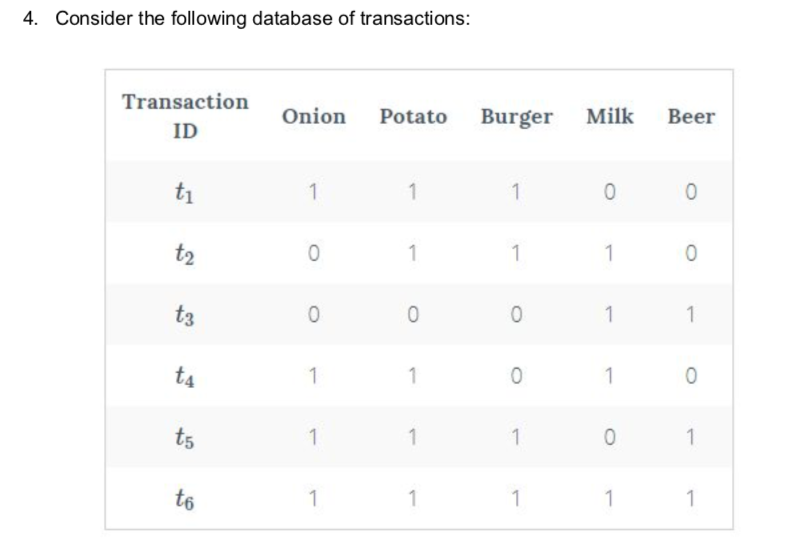

In [12]:
Image(filename='Images/Apriori0.png')

1- Create a frequency table of all the items that occur in all the transactions. 

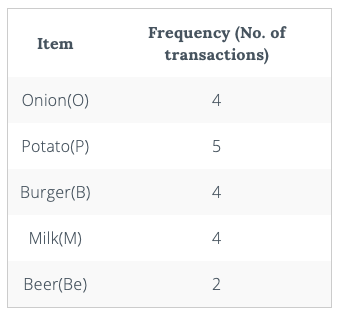

In [13]:
Image(filename='Images/Apriori.v1.png')

2- We know that only those elements are significant for which the support is greater than or equal to the threshold support.Here, support threshold is 50%, hence only those items are significant which occur in more than three transactions and such items are Onion(O), Potato(P), Burger(B), and Milk(M). Therefore, we are left with:

In [14]:
Image(filename='Images/Apriori.v2.png')

3- The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA. To do this, take the first item and pair it with all the others such as OP, OB, OM. Similarly, consider the second item and pair it with preceding items, i.e., PB, PM. We are only considering the preceding items because PO (same as OP) already exists. So, all the pairs in our example are OP, OB, OM, PB, PM, BM.

4- We will now count the occurrences of each pair in all the transactions.

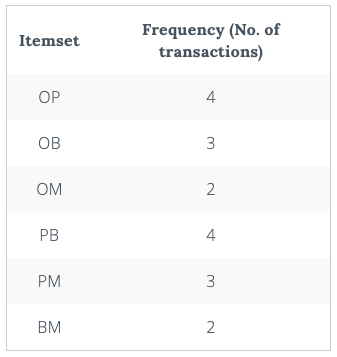

In [15]:
Image(filename='Images/Apriori.v4.png')

5- Again only those itemsets are significant which cross the support threshold, and those are OP, OB, PB, and PM.

6- Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

To create a set of 3 items another rule, called self-join is required. It says that from the item pairs OP, OB, PB and PM we look for two pairs with the identical first letter and so we get

OP and OB, this gives OPB
PB and PM, this gives PBM
Next, we find the frequency for these two itemsets.

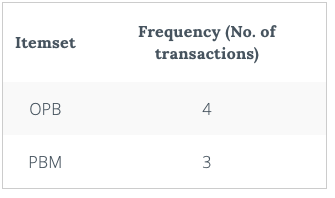

In [16]:
Image(filename='Images/Apriori.v6.png')

## Python apriori library 

In [17]:
from  efficient_apriori import apriori

In [18]:
data

Date Time  Transaction           Item
0      2016-10-30   09            1          Bread
1      2016-10-30   10            2   Scandinavian
2      2016-10-30   10            2   Scandinavian
3      2016-10-30   10            3  Hot chocolate
4      2016-10-30   10            3            Jam
...           ...  ...          ...            ...
21288  2017-04-09   14         9682         Coffee
21289  2017-04-09   14         9682            Tea
21290  2017-04-09   14         9683         Coffee
21291  2017-04-09   14         9683         Pastry
21292  2017-04-09   15         9684      Smoothies

[21293 rows x 4 columns]

In [19]:
data_itemset = data.groupby('Transaction')['Item'].apply(pd.Series.tolist).tolist()

In [20]:
for i in range(len(data_itemset)):
    data_itemset[i] = tuple(data_itemset[i])

In [21]:
itemsets, rules = apriori(data_itemset[0:], min_support=.01,  min_confidence=.1)

In [22]:
itemsets

{1: {('Bread',): 3097,
  ('Scandinavian',): 275,
  ('Hot chocolate',): 552,
  ('Cookies',): 515,
  ('Jam',): 142,
  ('Muffin',): 364,
  ('Pastry',): 815,
  ('Coffee',): 4528,
  ('Medialuna',): 585,
  ('Tea',): 1350,
  ('NONE',): 753,
  ('Mineral water',): 134,
  ('Farm House',): 371,
  ('Fudge',): 142,
  ('Juice',): 365,
  ('Hearty & Seasonal',): 100,
  ('Soup',): 326,
  ('Cake',): 983,
  ('Coke',): 184,
  ('Sandwich',): 680,
  ('Alfajores',): 344,
  ('Brownie',): 379,
  ('Truffles',): 192,
  ('Jammie Dodgers',): 125,
  ('Tiffin',): 146,
  ('Toast',): 318,
  ('Scone',): 327,
  ('Salad',): 99,
  ('Chicken Stew',): 123,
  ('Spanish Brunch',): 172,
  ('Baguette',): 152},
 2: {('Bread', 'Coffee'): 852,
  ('Bread', 'Pastry'): 276,
  ('Coffee', 'Pastry'): 450,
  ('Coffee', 'Medialuna'): 333,
  ('Coffee', 'Tea'): 472,
  ('Bread', 'Medialuna'): 160,
  ('Bread', 'NONE'): 196,
  ('Coffee', 'Muffin'): 178,
  ('Bread', 'Tea'): 266,
  ('Coffee', 'NONE'): 401,
  ('Coffee', 'Juice'): 195,
  ('Coffee'

In [23]:
rules

[{Coffee} -> {Bread},
 {Bread} -> {Coffee},
 {Pastry} -> {Bread},
 {Pastry} -> {Coffee},
 {Medialuna} -> {Coffee},
 {Tea} -> {Coffee},
 {Coffee} -> {Tea},
 {Medialuna} -> {Bread},
 {NONE} -> {Bread},
 {Muffin} -> {Coffee},
 {Tea} -> {Bread},
 {NONE} -> {Coffee},
 {Juice} -> {Coffee},
 {Hot chocolate} -> {Coffee},
 {Tea} -> {NONE},
 {NONE} -> {Tea},
 {Cookies} -> {Coffee},
 {Coffee} -> {Cake},
 {Cake} -> {Coffee},
 {Tea} -> {Cake},
 {Cake} -> {Tea},
 {Soup} -> {Coffee},
 {Tea} -> {Sandwich},
 {Sandwich} -> {Tea},
 {Cookies} -> {Bread},
 {Hot chocolate} -> {Bread},
 {Sandwich} -> {Bread},
 {Cake} -> {Bread},
 {Alfajores} -> {Coffee},
 {Sandwich} -> {Coffee},
 {Hot chocolate} -> {Cake},
 {Cake} -> {Hot chocolate},
 {Alfajores} -> {Bread},
 {Brownie} -> {Coffee},
 {Brownie} -> {Bread},
 {Scone} -> {Coffee},
 {Toast} -> {Coffee},
 {Spanish Brunch} -> {Coffee},
 {Coffee, Pastry} -> {Bread},
 {Bread, Pastry} -> {Coffee},
 {Bread, Coffee} -> {Pastry},
 {Pastry} -> {Bread, Coffee}]

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

- Run apriori algorithm for different min_support and a fixed min_confidence and plot a graph with x axis min_support and y-axis to be the number of rules generated.


- Run apriori algorithm for different min_confidence and a fixed min_support and plot a graph with x axis min_support and y-axis to be the number of rules generated.

</div>

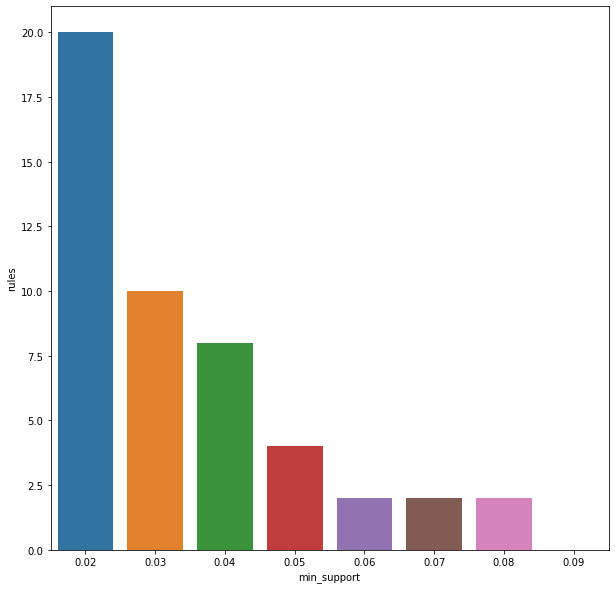

In [24]:
min_confidence = 0.1
min_support = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
dl = []
for x in min_support:
    itemsets, rules = apriori(data_itemset[0:], min_support= x,  min_confidence = min_confidence)
    dl.append(len(rules))
fig, ax = plt.subplots(figsize = (10,10))     
ax = sns.barplot(x="min_support", y="rules", data=pd.DataFrame(list(zip(min_support, dl)),columns =["min_support", "rules"]))
fig.show()

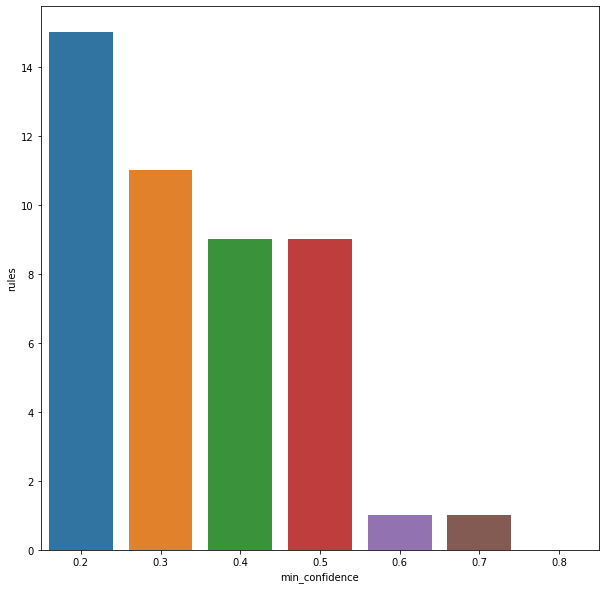

In [25]:
min_confidence = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_support = 0.02
dl = []
for x in min_confidence:
    itemsets, rules = apriori(data_itemset[0:], min_support= min_support,  min_confidence = x)
    dl.append(len(rules))
fig, ax = plt.subplots(figsize = (10,10))     
ax = sns.barplot(x="min_confidence", y="rules", data=pd.DataFrame(list(zip(min_confidence, dl)),columns =["min_confidence", "rules"]))
fig.show()

In [26]:
data_itemset = data.groupby('Transaction')['Item'].apply(pd.Series.tolist).tolist()
for i in range(len(data_itemset)):
    data_itemset[i] = tuple(data_itemset[i])
itemsets, rules = apriori(data_itemset[0:], min_support=.01,  min_confidence=.1)

In [27]:
rules

[{Coffee} -> {Bread},
 {Bread} -> {Coffee},
 {Pastry} -> {Bread},
 {Pastry} -> {Coffee},
 {Medialuna} -> {Coffee},
 {Tea} -> {Coffee},
 {Coffee} -> {Tea},
 {Medialuna} -> {Bread},
 {NONE} -> {Bread},
 {Muffin} -> {Coffee},
 {Tea} -> {Bread},
 {NONE} -> {Coffee},
 {Juice} -> {Coffee},
 {Hot chocolate} -> {Coffee},
 {Tea} -> {NONE},
 {NONE} -> {Tea},
 {Cookies} -> {Coffee},
 {Coffee} -> {Cake},
 {Cake} -> {Coffee},
 {Tea} -> {Cake},
 {Cake} -> {Tea},
 {Soup} -> {Coffee},
 {Tea} -> {Sandwich},
 {Sandwich} -> {Tea},
 {Cookies} -> {Bread},
 {Hot chocolate} -> {Bread},
 {Sandwich} -> {Bread},
 {Cake} -> {Bread},
 {Alfajores} -> {Coffee},
 {Sandwich} -> {Coffee},
 {Hot chocolate} -> {Cake},
 {Cake} -> {Hot chocolate},
 {Alfajores} -> {Bread},
 {Brownie} -> {Coffee},
 {Brownie} -> {Bread},
 {Scone} -> {Coffee},
 {Toast} -> {Coffee},
 {Spanish Brunch} -> {Coffee},
 {Coffee, Pastry} -> {Bread},
 {Bread, Pastry} -> {Coffee},
 {Bread, Coffee} -> {Pastry},
 {Pastry} -> {Bread, Coffee}]

In [28]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules[i].lhs:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules[i].rhs:
             
#             G1.add_nodes_from(c)
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')  
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
#   nx.draw(G1)
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

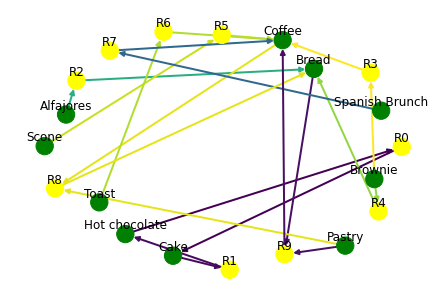

In [29]:
draw_graph (rules[30:40], 10)


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task7

Draw a graph that shows a consequence at center of the graph and precedence for each rule around it.

More concretely consider consequence to be "Tea" and use rules with only one precedence and choose at most 12 rules.

It should be something like the following graph but for "Tea" as a consequence.


</div>

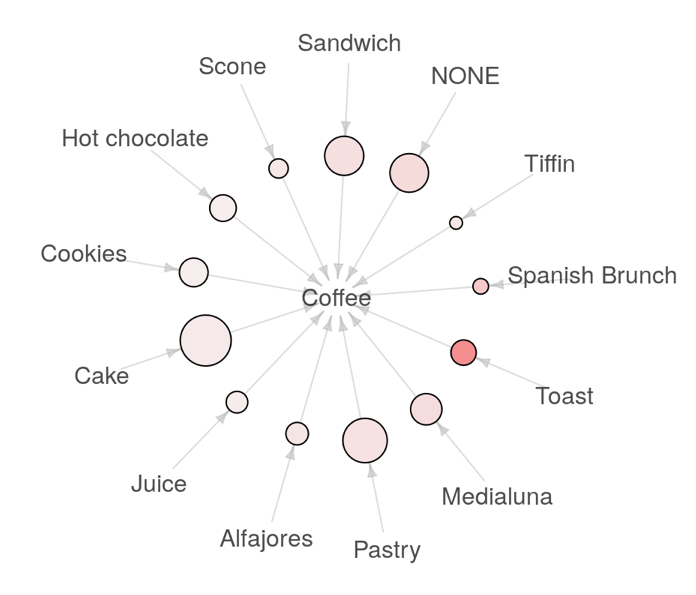

In [30]:
Image(filename='Images/Graph.png')

In [31]:
tea = []
tea1 = []
for i in rules:
    #print(i.lhs)
    #print(i.rhs)
    if i.lhs == ('Tea',):
        tea.append(i.rhs)
        tea1.append(i)
print(tea)
print(tea1)

[('Coffee',), ('Bread',), ('NONE',), ('Cake',), ('Sandwich',)]
[{Tea} -> {Coffee}, {Tea} -> {Bread}, {Tea} -> {NONE}, {Tea} -> {Cake}, {Tea} -> {Sandwich}]


In [32]:
import networkx as nx  



def draw_graph1(rules, rules_to_show):
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)      
   
    for i in range (rules_to_show):      
        for a in rules[i].lhs:
            G1.add_nodes_from([a])
#            G1.add_edge(a,"R"+str(i), color=colors[i] , weight = 2)
            for c in rules[i].rhs:
              #  G1.add_nodes_from(c)
                G1.add_edge(a, c, color=colors[i],  weight=2) 
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    pos["Tea"] = [0,0]
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
#   nx.draw(G1)
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

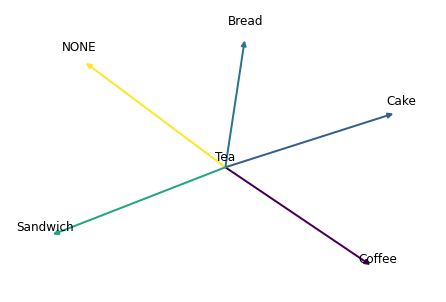

In [33]:
draw_graph1(tea1, len(tea1))

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task8

In the default credit dataset try to find the followings.

- Find a concise pattern.
- Find a general pattern.
- Find a peculiar pattern.

Use the definition of conciseness, generality and peculiarity from the following paper.

https://www.researchgate.net/publication/220566216_Interestingness_Measures_for_Data_Mining_A_Survey

</div>

In [34]:
data = pd.read_excel('default of credit card clients.xls')
data

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0      PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
1         -1     -1  ...          0          0          0         0       689   
2          0      0  ...       3272       3455       3261         0      1000   
3          0      0  ...      14331      14948      15549      1518      1500   
4          0      0  ...      28314      28959      29547      2000      2019   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29996      0      0  ...      88004      31237      15980      8500     20000   
29997     -1     -1  ...       8979       5190          0      1837      3526   
29998      2     -1  ...      20878      20582      19357         0         0   
29999      0      0  ...      52774      11855      48944     85900      3409   
30000      0      0  ...      36535      32428      15313      2078      1800   

            X20       X21       X22       X23                           Y  
0      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1             0         0         0         0                           1  
2          1000      1000         0      2000                           1  
3          1000      1000      1000      5000                           0  
4          1200      1100      1069      1000                           0  
...         ...       ...       ...       ...                         ...  
29996      5003      3047      5000      1000                           0  
29997      8998       129         0         0                           0  
29998     22000      4200      2000      3100                           1  
29999      1178      1926     52964      1804                           1  
30000      1430      1000      1000      1000                           1  

[30001 rows x 25 columns]

In [35]:
listt = []
for i in range(1, len(data)):
    listt.append(('Sex'+str(data.X2[i]), 'Education'+str(data.X3[i]), 'Marriage'+str(data.X4[i]), 'Age'+str(data.X5[i]), 
                  'Pay0'+str(data.X6[i]), 'Pay2'+str(data.X7[i]), 'Pay3'+str(data.X8[i]), 'Pay4'+str(data.X9[i])))

In [36]:
print('Conciseness')
print('A pattern is concise if it contains relatively few attribute-value pairs, while a set of patterns is concise if it contains relatively few patterns. A concise pattern or set of patterns is relatively easy to understand and remember and thus is added more easily to the user’s knowledge (set of beliefs). Accordingly, much research has been conducted to find a “minimum set of patterns,” using properties such as monotonicity [Padmanabhan and Tuzhilin 2000] and confidence invariance [Bastide et al. 2000].')

Conciseness
A pattern is concise if it contains relatively few attribute-value pairs, while a set of patterns is concise if it contains relatively few patterns. A concise pattern or set of patterns is relatively easy to understand and remember and thus is added more easily to the user’s knowledge (set of beliefs). Accordingly, much research has been conducted to find a “minimum set of patterns,” using properties such as monotonicity [Padmanabhan and Tuzhilin 2000] and confidence invariance [Bastide et al. 2000].


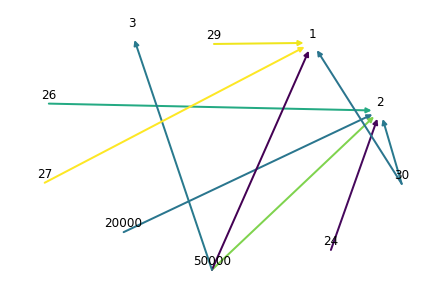

This analysis of conciseness represents that most students from Univerity and graduate school take loans and those students are in early twenties.


In [37]:
l = []
for i in range(1, len(data.X5)):
    l.append((data.X5[i], data.X1[i], data.X3[i]))
itemsets, rules = apriori(l[0:], min_support=.02,  min_confidence=.2)
draw_graph1(rules, 10)
print('This analysis of conciseness represents that most students from Univerity and graduate school take loans and those students are in early twenties.')

In [38]:
print('Generality/Coverage')
print('A pattern is general if it covers a relatively large subset of a dataset. Generality (or coverage) measures the comprehensiveness of a pattern, that is, the fraction of all records in the dataset that matches the pattern. If a pattern characterizes more information in the dataset, it tends to be more interesting [Agrawal and Srikant 1994; Webb and Brain 2002]. Frequent itemsets are the most studied general patterns in the data mining literature. An itemset is a set of items, such as some items from a grocery basket. An itemset is frequent if its support, the fraction of records in the dataset containing the itemset, is above a given threshold [Agrawal and Srikant 1994]. The best known algorithm for finding frequent itemsets is the Apriori algorithm [Agrawal and Srikant 1994]. Some generality measures can form the bases for pruning strategies; for example, the support measure is used in the Apriori algorithm as the basis for pruning itemsets. For classification rules, Webb and Brain [2002] gave an empirical evaluation showing how generality affects classification results. Generality frequently coincides with conciseness because concise patterns tend to have greater coverage.')

Generality/Coverage
A pattern is general if it covers a relatively large subset of a dataset. Generality (or coverage) measures the comprehensiveness of a pattern, that is, the fraction of all records in the dataset that matches the pattern. If a pattern characterizes more information in the dataset, it tends to be more interesting [Agrawal and Srikant 1994; Webb and Brain 2002]. Frequent itemsets are the most studied general patterns in the data mining literature. An itemset is a set of items, such as some items from a grocery basket. An itemset is frequent if its support, the fraction of records in the dataset containing the itemset, is above a given threshold [Agrawal and Srikant 1994]. The best known algorithm for finding frequent itemsets is the Apriori algorithm [Agrawal and Srikant 1994]. Some generality measures can form the bases for pruning strategies; for example, the support measure is used in the Apriori algorithm as the basis for pruning itemsets. For classification rules

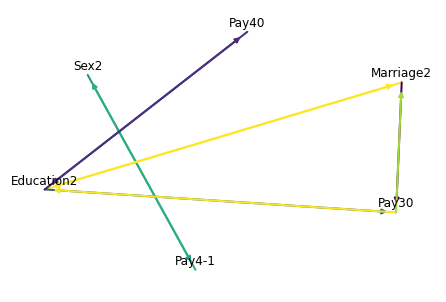

This analysis shows that people who are student in Univeristy and single delays payment for 2 to 4 months, people who are married but not studying also delays payment by 2 to 3 months. SO, all people delays payment by atleast 2 months.


In [39]:
itemsets, rules = apriori(listt, min_support=.1,  min_confidence=.1)
draw_graph1(rules[10:40], 10)
print('This analysis shows that people who are student in Univeristy and single delays payment for 2 to 4 months, people who are married but not studying also delays payment by 2 to 3 months. SO, all people delays payment by atleast 2 months.')

In [40]:
print('Peculiarity')
print('A pattern is peculiar if it is far away from other discovered patterns according to some distance measure. Peculiar patterns are generated from peculiar data (or outliers), which are relatively few in number and significantly different from the rest of the data [Knorr et al. 2000; Zhong et al. 2003]. Peculiar patterns may be unknown to the user, hence interesting.')
print('Gotten from the mentioned paper')

Peculiarity
A pattern is peculiar if it is far away from other discovered patterns according to some distance measure. Peculiar patterns are generated from peculiar data (or outliers), which are relatively few in number and significantly different from the rest of the data [Knorr et al. 2000; Zhong et al. 2003]. Peculiar patterns may be unknown to the user, hence interesting.
Gotten from the mentioned paper


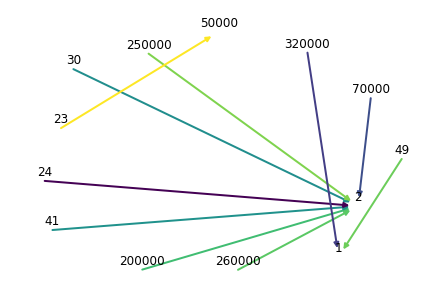

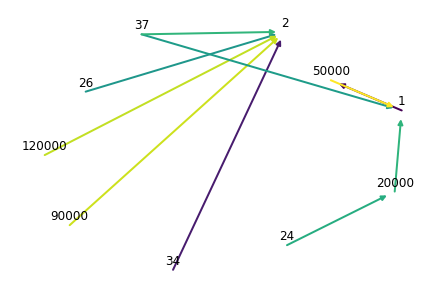

This analysis shows that students in university are in debt which is higher then those students who are in other level of studies.


In [41]:
lp = []
for i in range(1, len(data.X5)):
    lp.append((data.X5[i], data.X1[i], data.X4[i]))
itemsets, rules = apriori(lp[0:], min_support=.005,  min_confidence=.1)
draw_graph1(rules[20:30], 10)
draw_graph1(rules, 10)
print('This analysis shows that students in university are in debt which is higher then those students who are in other level of studies.')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task9

How is entrooy related to frequncy of itermsets? explain.

To get help, refer to the following paper.

https://www.researchgate.net/publication/221653139_Finding_low-entropy_sets_and_trees_from_binary_data/link/5414967d0cf2bb7347db32fa/download

</div>

In [42]:
d = dict()
data1 = data[1:]
for x in data1.X2.unique():
    d["Sex"+str(x)] = len(data1[data1.X2 == x])
for x in data1.X3.unique():
    d["Edu"+str(x)] = len(data1[data1.X3 == x])
for x in data1.X4.unique():
    d["Marriage"+str(x)] = len(data1[data1.X4 == x])
    
for x in data1.X6.unique():
    d["Pay0"+str(x)] = len(data1[data1.X6 == x])
    
for x in data1.X7.unique():
    d["Pay2"+str(x)] = len(data1[data1.X7 == x])



In [43]:
fig, ax = plt.subplots(figsize = (10,10))     
ax = sns.barplot(x="Values", y="Frequency", data=pd.DataFrame(list(zip(d.keys(), d.values())),columns =["Values", "Frequency"]))
fig.show()

In [44]:
print('The plot shows that how data of different categories is divided among people according to characteristics such as male female, college university and graduate school etc')

The plot shows that how data of different categories is divided among people according to characteristics such as male female, college university and graduate school etc
